### Solving the Navier-Stokes Equations in 2D - Channel Flow

In [1]:
# Import libraries
#
# numpy as usual, and then several libraries from matplotlib for 3D plotting/animation
#

import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import rc
import matplotlib
%matplotlib inline

#### Generic function for plotting a 3D surface (i.e. the value of a scalar field in 2D)

In [2]:
def plot2D(x, y, p, xrange, yrange):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis, 
                           linewidth=0, antialiased=False)
    ax.set_xlim(0, xrange)
    ax.set_ylim(0, yrange)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

### Navier-Stokes Equations for an Incompressible Fluid with a Forcing Term

\begin{equation}
\vec{\nabla} \cdot \vec{v} = 0
\end{equation}

\begin{equation}
\frac{\partial \vec{v}}{\partial t} + (\vec{v} \cdot \vec{\nabla}) \vec{v} = - \frac{1}{\rho} \nabla P +
\nu \nabla^2 \vec{v} + \vec{F}
\end{equation}

The first of these is the continuity equation, which represents conservation of mass, and the second is the
momentum equation.  The problem here is that mathematically, there is no obvious
way to couple the velocity field and the pressure field.

However, for an incompressible flow, the first equation actually provides a 
$kinematic~constraint$.  Basically, what we have to do is to construct a pressure
field that guarantees that the continuity equation is satisfied.  We can
do this by taking the divergence of the momentum equation. See Poisson_2D.ipynb for more details!

For the forcing term, we will assume that it is entirely in the x-direction.

Momentum Equations in 2D:

\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x}  + v \frac{\partial u}{\partial y} = - \frac{1}{\rho} \frac{\partial P}{\partial x} + \nu \left ( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right ) + F
\end{equation}

\begin{equation}
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x}  + v \frac{\partial v}{\partial y} = - \frac{1}{\rho} \frac{\partial P}{\partial y} + \nu \left ( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right )
\end{equation}

Poisson's Equation in 2D:

\begin{equation}
\frac{\partial^2 P}{\partial x^2} + \frac{\partial^2 P}{\partial y^2} -\rho \left ( (\frac{\partial u}{\partial x})^2 + 2 \frac{\partial u}{\partial y} \frac{\partial v}{\partial x} + (\frac{\partial v}{\partial y})^2  \right )
\end{equation}

### Discretization of the Momentum Equations and Poisson's Equation in 2D

We use the usual methods here to discretize the equations above. See https://nbviewer.jupyter.org/github/barbagroup/CFDPython/blob/master/lessons/14_Step_11.ipynb
for all of the details!

The momentum equation in the $u$ direction:

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(P_{i+1,j}^{n}-P_{i-1,j}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right) + F_{ij}
\end{split}
$$

The momentum equation in the $v$ direction:

$$
\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n})\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(P_{i,j+1}^{n}-P_{i,j-1}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right)
\end{split}
$$

The pressure-Poisson equation:

$$
\begin{split}
P_{i,j}^{n} = & \frac{\left(P_{i+1,j}^{n}+P_{i-1,j}^{n}\right) \Delta y^2 + \left(P_{i,j+1}^{n}+P_{i,j-1}^{n}\right) \Delta x^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

### Simulation of flow in a channel

The initial condition is $u, v, p = 0$ everywhere, and the boundary conditions are:

$u, v, p$ are periodic on $x=0,2$;

$u, v=0$ at $y=0,2$ (the top and bottom of the channel);

$\frac{\partial p}{\partial y}=0$ at $y=0,2$;

$F = 1$ everywhere.



In [9]:
xrange = 2.0
yrange = 2.0

nx = 41
ny = 41

nit = 50

dx = xrange / (nx - 1)
dy = yrange / (ny - 1)
x = np.linspace(0, xrange, nx)
y = np.linspace(0, yrange, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001
F = 1

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.ones((ny, nx)) 


In order to make things a bit more manageable, we will write a couple of functions.  The first is to handle the calculation of the "b" term in the pressure-Poisson equation.  Note that in this example, we have implemented the periodic boundary conditions at x=0,2 explicitly.

The second is a function which iterates the pressure-Poisson equation, in pretty much the same way as we did
in Poisson_2D.ipynb - the difference here is that we use a pseudo-time variable, $nit$, in order to control the
number of iterations.  That is, we do not iterate until "stability" is reached; we will just make sure that $nit$
is large enough that we have reached an approximate equilibrium.

In [10]:
def build_up_b(rho, dt, u, v, dx, dy):
    b = np.zeros_like(u)
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) +
                                      (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                            ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                            2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                                 (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                            ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    
    # Periodic BC Pressure @ x = 2
    b[1:-1, -1] = (rho * (1 / dt * ((u[1:-1, 0] - u[1:-1,-2]) / (2 * dx) +
                                    (v[2:, -1] - v[0:-2, -1]) / (2 * dy)) -
                          ((u[1:-1, 0] - u[1:-1, -2]) / (2 * dx))**2 -
                          2 * ((u[2:, -1] - u[0:-2, -1]) / (2 * dy) *
                               (v[1:-1, 0] - v[1:-1, -2]) / (2 * dx)) -
                          ((v[2:, -1] - v[0:-2, -1]) / (2 * dy))**2))

    # Periodic BC Pressure @ x = 0
    b[1:-1, 0] = (rho * (1 / dt * ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx) +
                                   (v[2:, 0] - v[0:-2, 0]) / (2 * dy)) -
                         ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx))**2 -
                         2 * ((u[2:, 0] - u[0:-2, 0]) / (2 * dy) *
                              (v[1:-1, 1] - v[1:-1, -1]) / (2 * dx))-
                         ((v[2:, 0] - v[0:-2, 0]) / (2 * dy))**2))
    
    return b

In [11]:
def pressure_poisson(p, dx, dy):
    pn = np.empty_like(p)
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                         (2 * (dx**2 + dy**2)) -
                         dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 1:-1])

        # Periodic BC Pressure @ x = 2
        p[1:-1, -1] = (((pn[1:-1, 0] + pn[1:-1, -2])* dy**2 +
                        (pn[2:, -1] + pn[0:-2, -1]) * dx**2) /
                       (2 * (dx**2 + dy**2)) -
                       dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, -1])

        # Periodic BC Pressure @ x = 0
        p[1:-1, 0] = (((pn[1:-1, 1] + pn[1:-1, -1])* dy**2 +
                       (pn[2:, 0] + pn[0:-2, 0]) * dx**2) /
                      (2 * (dx**2 + dy**2)) -
                      dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 0])
        
        # Wall boundary conditions, pressure
        p[-1, :] =p[-2, :]  # dp/dy = 0 at y = 2
        p[0, :] = p[1, :]  # dp/dy = 0 at y = 0
    
    return p

Okay, now we are finally read to implement the algorithm.

The philosophy is this:

1. At the first time interval, first calculate the pressure field, using the two functions above.
2. Then, with this known pressure field, calculate the next time interval for each of $u$ and $v$.
3. Repeat steps 1 and 2 successively for all of the timesteps.

In [17]:
def channel_flow(udiff_min, dt, dx, dy, rho, nu, u, v, p):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    
    stepcount = 0
    udiff = 1
    
    while udiff > udiff_min:
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                         un[1:-1, 1:-1] * dt / dx * 
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy * 
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * 
                        (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 * 
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])) + 
                         F * dt)

        v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                         un[1:-1, 1:-1] * dt / dx * 
                        (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy * 
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                         dt / (2 * rho * dy) * 
                        (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                         nu * (dt / dx**2 *
                        (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                         dt / dy**2 * 
                        (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))


        
        # Periodic BC u @ x = 0
        u[1:-1, 0] = (un[1:-1, 0] - un[1:-1, 0] * dt / dx *
                     (un[1:-1, 0] - un[1:-1, -1]) -
                      vn[1:-1, 0] * dt / dy * 
                     (un[1:-1, 0] - un[0:-2, 0]) - 
                      dt / (2 * rho * dx) * 
                     (p[1:-1, 1] - p[1:-1, -1]) + 
                      nu * (dt / dx**2 * 
                     (un[1:-1, 1] - 2 * un[1:-1, 0] + un[1:-1, -1]) +
                      dt / dy**2 *
                     (un[2:, 0] - 2 * un[1:-1, 0] + un[0:-2, 0])) + F*dt)

        # Periodic BC v @ x = 2
        v[1:-1, -1] = (vn[1:-1, -1] - un[1:-1, -1] * dt / dx *
                      (vn[1:-1, -1] - vn[1:-1, -2]) - 
                       vn[1:-1, -1] * dt / dy *
                      (vn[1:-1, -1] - vn[0:-2, -1]) -
                        dt / (2 * rho * dy) * 
                      (p[2:, -1] - p[0:-2, -1]) +
                        nu * (dt / dx**2 *
                      (vn[1:-1, 0] - 2 * vn[1:-1, -1] + vn[1:-1, -2]) +
                       dt / dy**2 *
                      (vn[2:, -1] - 2 * vn[1:-1, -1] + vn[0:-2, -1])))

        # Periodic BC v @ x = 0
        v[1:-1, 0] = (vn[1:-1, 0] - un[1:-1, 0] * dt / dx *
                     (vn[1:-1, 0] - vn[1:-1, -1]) -
                      vn[1:-1, 0] * dt / dy *
                    (vn[1:-1, 0] - vn[0:-2, 0]) -
                      dt / (2 * rho * dy) * 
                     (p[2:, 0] - p[0:-2, 0]) +
                      nu * (dt / dx**2 * 
                     (vn[1:-1, 1] - 2 * vn[1:-1, 0] + vn[1:-1, -1]) +
                      dt / dy**2 * 
                     (vn[2:, 0] - 2 * vn[1:-1, 0] + vn[0:-2, 0])))


        # Wall BC: u,v = 0 @ y = 0,2
        u[0, :] = 0
        u[-1, :] = 0
        v[0, :] = 0
        v[-1, :]=0
    
        udiff = (np.sum(u) - np.sum(un)) / np.sum(u)
        print (udiff)
        stepcount += 1
        
    return u, v, p, stepcount

Start with udiff_min = 0.001 and see what things look like!

In [18]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.ones((ny, nx))
b = np.zeros((ny, nx))

udiff_min = 0.001

u, v, p, stepcount = channel_flow(udiff_min, dt, dx, dy, rho, nu, u, v, p)
print (stepcount)

1.0
0.4989849982041502
0.3320151080917942
0.2485541251616378
0.19849501046825674
0.1651355664038972
0.14131782101962861
0.12346287568286518
0.10958252218660139
0.0984838905544555
0.08940792607920052
0.08184862845388097
0.07545571949033408
0.06997902507426788
0.06523510466669696
0.061086395012261666
0.05742771511454743
0.05417726973779706
0.05127049406194583
0.0486557450696938
0.04629122407358998
0.04414273864450809
0.04218204846126037
0.040385624762398785
0.038733707584340804
0.03720958060645987
0.0357990071813491
0.03448978724957723
0.03327140595621032
0.032134752568848755
0.031071893819950992
0.030075889765827642
0.029140643141653707
0.028260775314565285
0.027431523513787456
0.026648655199339736
0.02590839632581946
0.02520737094072072
0.024542550082085276
0.02391120834741406
0.02331088682351594
0.02273936131661845
0.022194615019456538
0.021674814909066673
0.021178291294613252
0.020703520035595516
0.02024910703246148
0.01981377465800714
0.019396349852107524
0.018995753646738004
0.0186

0.0019172640049978688
0.0019121159179398834
0.0019069920397429391
0.0019018921984469512
0.0018968162237004258
0.0018917639467422656
0.0018867352003828126
0.0018817298189852617
0.0018767476384500218
0.0018717884961927992
0.0018668522311312441
0.0018619386836654264
0.0018570476956611328
0.0018521791104337258
0.0018473327727309996
0.0018425085287170416
0.0018377062259564228
0.0018329257133972755
0.0018281668413576795
0.0018234294615081658
0.0018187134268567561
0.0018140185917357328
0.0018093448117842152
0.0018046919439355454
0.001800059846401794
0.001795448378660643
0.0017908574014383178
0.00178628677670119
0.0017817363676358167
0.0017772060386400301
0.001772695655307679
0.0017682050844155068
0.001763734193911056
0.0017592828528990162
0.001754850931628176
0.0017504383014806774
0.0017460448349582124
0.0017416704056703103
0.0017373148883219277
0.0017329781587028894
0.0017286600936749275
0.0017243605711597292
0.0017200794701296657
0.0017158166705946417
0.00171157205359184
0.00170734550117391

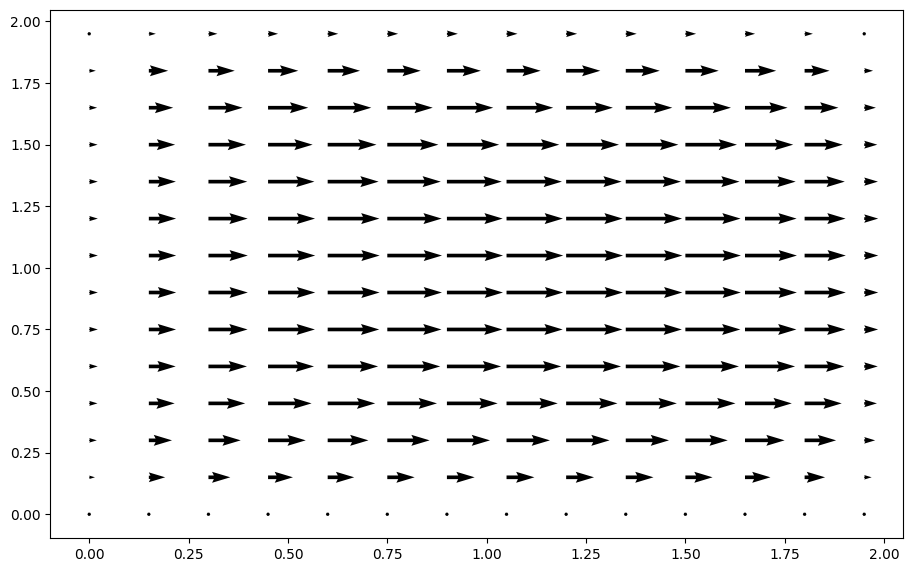

In [19]:
fig = pyplot.figure(figsize = (11,7), dpi=100)
pyplot.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]);

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: No contour levels were found within the data range.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Y')

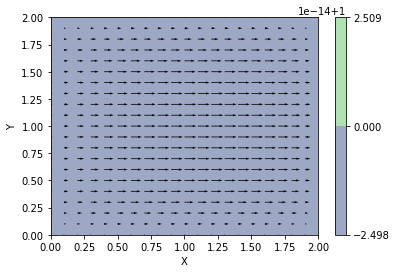

In [15]:
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
pyplot.xlabel('X')
pyplot.ylabel('Y')

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: No contour levels were found within the data range.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Y')

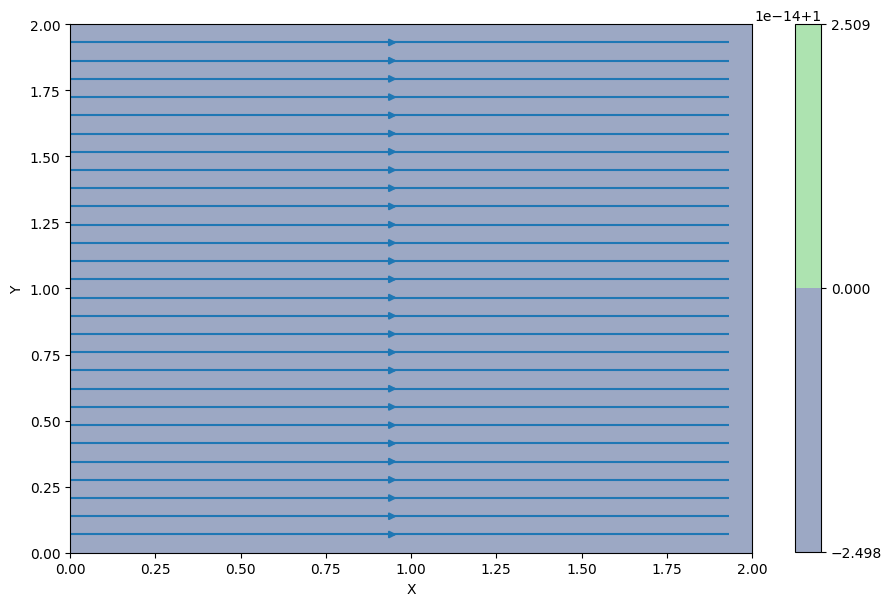

In [16]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.streamplot(X, Y, u, v)
pyplot.xlabel('X')
pyplot.ylabel('Y')